# INFO 1998 '23 Final Project: Predicting Song Genres Using Machine Learning

### Parker Rho (pkr47), Aaron Song (ams799)

#### Rationale
Our goal for this project was to develop a model that could first find characteristics of the songs that correlated the strongest to a song's genre, then predict what genre a song can be based on those categories. We utilized various techniques acquired through INFO 1998 including but not limited to: data filtration, data visualization, and machine learning models. We chose a topic that we were not only passionate about, but also felt could reflect our semester's learning.

## Finding the Dataset

As active musicians in multiple ensembles, we scoured the internet for publically available datasets that displayed two distict characteristics: Data that pertained to our interests and sufficent information to create an accurate model. Thus, we settled on a dataset that included Top Hits on Spotify from 2000 to 2019. The CSV dataset was obtained under the CC 4.0 free and public use license, as hosted by Kaggle.com and its publishers. The data was collected with Spotipy library for Python. For extracting songs features was used Spotify playlists from 2000 to 2019 years.

The dataset can be found here: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

2000 songs were organized characterized by the following columns:

- __Artist:__ 
_Name of the Artist._

- __Song:__ 
_Name of the Track._

- __Duration_ms:__
_Duration of the track in milliseconds._

- __Explicit:__ 
_The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children._

- __Year:__
_Release Year of the track._

- __Popularity:__
_The higher the value the more popular the song is._

- __Danceability:__
_Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable._

- __Energy:__
_Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity._

- __Key:__ 
_The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1._

- __Loudness:__
_The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db._

- __Mode:__
_Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0._

- __Speechiness:__
_Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks._

- __Acousticness:__
_A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic._

- __Instrumentalness:__
_Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0._

- __Liveness:__
_Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live._

- __Valence:__
_A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)._

- __Tempo:__
_The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration._

- __Genre:__
_Genre of the track._

## Importing the Data

After downloading the dataset from Kaggle, we imported the necessary libraries as well as the dataset itself in csv form.

In [387]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing as ඞ
# import sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

In [388]:
df = pd.read_csv('songs_normalize.csv')
df.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## What Defines Genre?

In order to find which of these categories would be useful in predicting the "genre," we filtered the data by genre and used data visualization in the form of correlation plots to find the correlation between genre and other categories. We chose the top 5 most popular and frequent genres to work with to avoid overloading our statistics. After comparing the amount of songs within all genres, the most frequent were: Pop, Rock, R&B, Hip Hop, and Dance/Electronic songs.

In [389]:
#Filtering by Pop Songs
pop = df[df['genre'].str.contains('pop')]
pop = pop.drop_duplicates()
pop['genre'] = 1
# corrPop = pop.corr() 
# sns.heatmap(corrPop, annot=True)
# sns.set(rc = {'figure.figsize':(15,8)})
# plt.title('Pop Songs')
# plt.show()

#Finds the mean of each category and amount of songs for Pop
pop1 = pop.drop(columns=['artist','song','explicit','genre'])
popMean = pop1.mean()
popSize = len(pop)

#Normalizing each category and finding 
# pop2 = ඞ.normalize(pop1)
# scaled_df = pd.DataFrame(pop2, columns=pop1.columns)
# pop3 = scaled_df.mean()

# pop4=[]
# for x in range(13):
#     pop4.append(pop3[x])
# print(pop4)
# names = ['duration_ms','explicit','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
# plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13], pop4, align = 'center')
# plt.title('Normalized Pop Song Data')
# plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],names)
# plt.xticks(rotation = 90)

In [390]:
#Filtering by Rock Songs
rock = df[df['genre'].str.contains('rock')]
rock = rock.drop_duplicates()
rock['genre'] = 2
# corrRock = rock.corr() 
# sns.heatmap(corrRock, annot=True)
# sns.set(rc = {'figure.figsize':(15,8)})
# plt.title('Rock Songs')
# plt.show()

#Finds the mean of each category and amount of songs for Rock
rock1 = rock.drop(columns=['artist','song','explicit','genre'])
rockMean = rock1.mean()
rockSize = len(rock)

In [391]:
#Filtering by R&B Songs
RnB = df[df['genre'].str.contains('R&B')]
RnB = RnB.drop_duplicates()
RnB['genre'] = 3
# corrRnB = RnB.corr() 
# sns.heatmap(corrRnB, annot=True)
# sns.set(rc = {'figure.figsize':(15,8)})
# plt.title('R&B Songs')
# plt.show()

#Finds the mean of each category and amount of songs for R&B
RnB1 = RnB.drop(columns=['artist','song','explicit','genre'])
RnBMean = RnB1.mean()
RnBSize = len(RnB)

In [392]:
#Filtering by Hip Hop Songs
hiphop = df[df['genre'].str.contains('hip hop')]
hiphop = hiphop.drop_duplicates()
hiphop['genre'] = 4
# corrHiphop = hiphop.corr() 
# sns.heatmap(corrHiphop, annot=True)
# sns.set(rc = {'figure.figsize':(15,8)})
# plt.title('Hip Hop Songs')
# plt.show()

#Finds the mean of each category and amount of songs for Hip Hop
hiphop1 = hiphop.drop(columns=['artist','song','explicit','genre'])
hiphopMean = hiphop1.mean()
hiphopSize = len(hiphop)

In [393]:
#Filtering by Dance/Electronic Songs

dance = df[df['genre'].str.contains('Dance/Electronic')]
dance = dance.drop_duplicates()
dance['genre'] = 5
# corrDance = dance.corr() 
# sns.heatmap(corrDance, annot=True)
# sns.set(rc = {'figure.figsize':(15,8)})
# plt.title('Dance/Electronic Songs')
# plt.show()

#Finds the mean of each category and amount of songs for Dance
dance1 = dance.drop(columns=['artist','song','explicit','genre'])
danceMean = dance1.mean()
danceSize = len(dance)

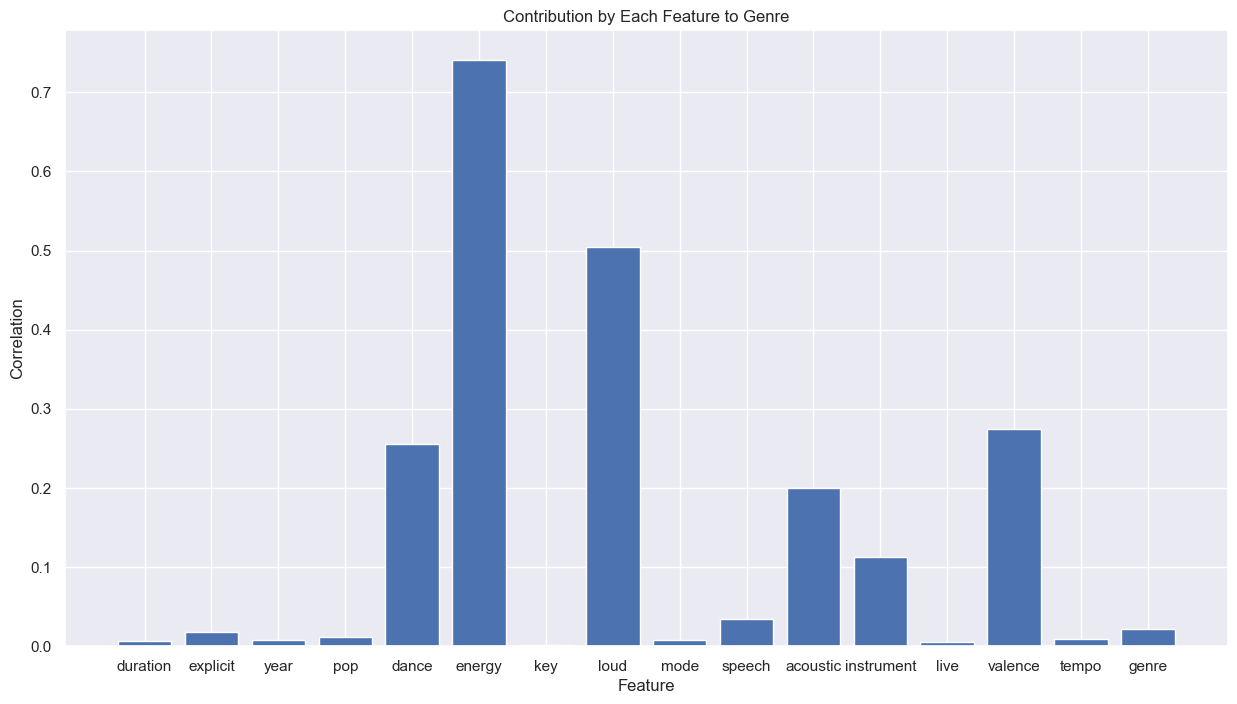

In [404]:
from sklearn.decomposition import PCA

#Cleaned up data with only songs from 5 genres
genre_data = pd.concat([pop, rock, RnB, hiphop, dance])
genre_data = genre_data.sort_index()
genre_data = genre_data.drop('artist', axis=1)
genre_data = genre_data.drop('song', axis=1)

genre_data = pd.DataFrame(ඞ.scale(genre_data),columns = genre_data.columns)

pca = PCA().fit(genre_data)

columns = ['duration', 'explicit', 'year', 'pop', 'dance', 'energy', 'key', 'loud', 'mode', 'speech', 'acoustic', 'instrument', 
           'live', 'valence', 'tempo', 'genre']
components = pd.DataFrame(pca.components_, columns=genre_data.columns)
plt.bar(columns, abs(components.iloc[15]))
plt.title('Contribution by Each Feature to Genre')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

Here we can see that energy, loudness, valence, and danceability are the biggest contributors to genre.

## What Makes Rock Popular?

Now that we have the categories with the highest correlation to defining genre, we will train a model on those categories to accurately predict whether a given song is of the rock genre or not. The accuracy caused by these categories indicates that these are the categories that make rock songs popular.

### Random Forest

Since we are dealing with categorical data we will try a random forest model across the various high-correlation categories found from our PCA analysis.

In [417]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import random
from sklearn.metrics import accuracy_score

df = pd.read_csv('songs_normalize.csv')
for x in range(0, len(df)):
    if df['genre'][x].find('rock') != -1:
        df.loc[x,'genre'] = 1
    else:
        df.loc[x,'genre'] = 0
df = df.drop('artist', axis = 1)
df = df.drop('song', axis = 1)
X = df[['energy', 'loudness', 'valence', 'danceability']]
Y = df['genre'].astype('int')

def rand_sample(size):
    indices = []
    for i in range(size):
        indices.append(random.randint(0,size-1))
    return indices

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
x_train = X
y_train = Y
tree_preds = []

for t in range(20):
    model = tree.DecisionTreeClassifier(max_depth=5)
    sample = rand_sample(y_train.size)
    X_train_tree = x_train.iloc[sample]
    Y_train_tree = y_train.iloc[sample]
    model.fit(X_train_tree, Y_train_tree)
    tree_preds.append(model.predict(x_train))
    
predictions = []
for pred in range(0,len(tree_preds[0])):
    # number of m's
    Rocks = 0
    for trees in range(0, len(tree_preds)):
        if tree_preds[trees][pred] == 1:
            Rocks += 1
    if Rocks > 10:
        predictions.append(1)
    else:
        predictions.append(0)
print("Accuracy of one decision tree: ", accuracy_score(y_train, model.predict(x_train)))
print("Accuracy of the random decision forest: ", accuracy_score(y_train, predictions))

Accuracy of one decision tree:  0.894
Accuracy of the random decision forest:  0.903


## Evolution of the Genre Over the Years

### K-Means Clustering

This time we will use K-Means Clustering to see how categories of the rock genre might have changed over the years. We will do this by using PCA to identify the categories that have the highest correlation with the rock genre and train a K-Means Clustering model to highlight 'eras' in the rock genre.

### What Defines Rock?

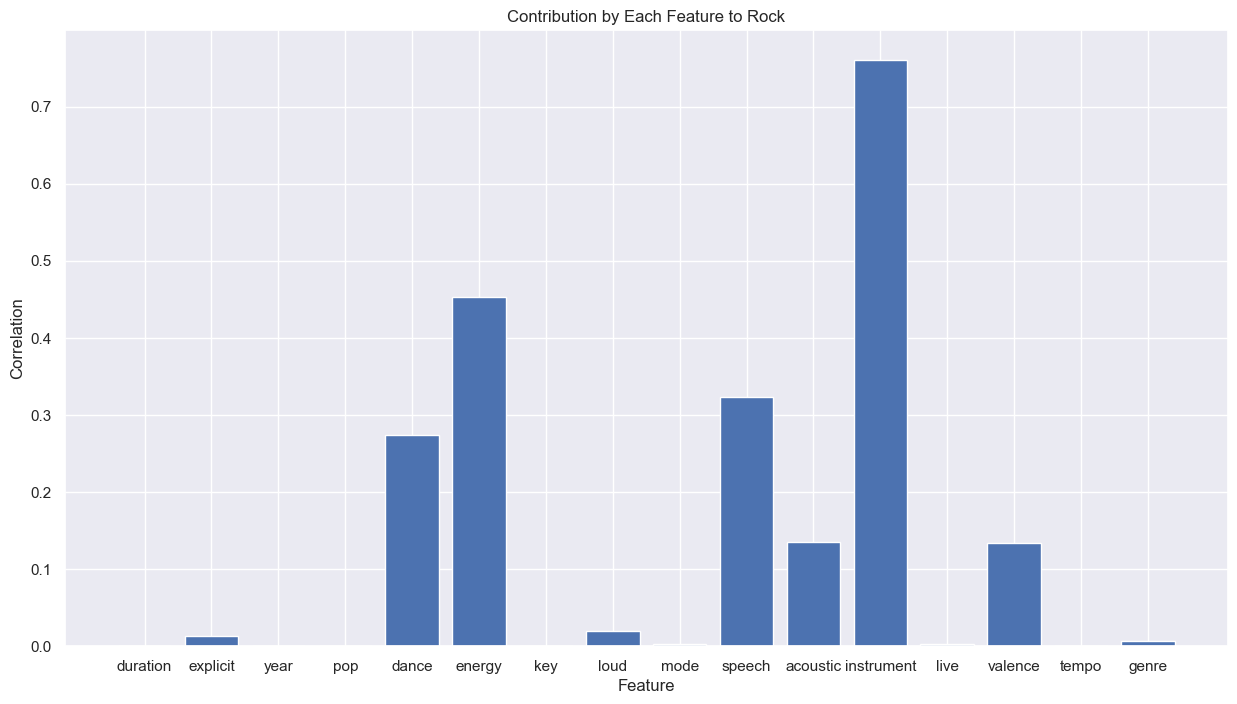

In [421]:
df = pd.read_csv('songs_normalize.csv')
df = df.drop('artist', axis = 1)
df = df.drop('song', axis = 1)
for x in range(0, len(df)):
    if df['genre'][x].find('rock') != -1:
        df.loc[x,'genre'] = 1
    else:
        df.loc[x,'genre'] = 0

pca = PCA().fit(df)

columns = ['duration', 'explicit', 'year', 'pop', 'dance', 'energy', 'key', 'loud', 'mode', 'speech', 'acoustic', 'instrument', 
           'live', 'valence', 'tempo', 'genre']
components = pd.DataFrame(pca.components_, columns=genre_data.columns)
plt.bar(columns, abs(components.iloc[15]))
plt.title('Contribution by Each Feature to Rock')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

We see that instrumentalness and energy are the defining features of the rock genre.

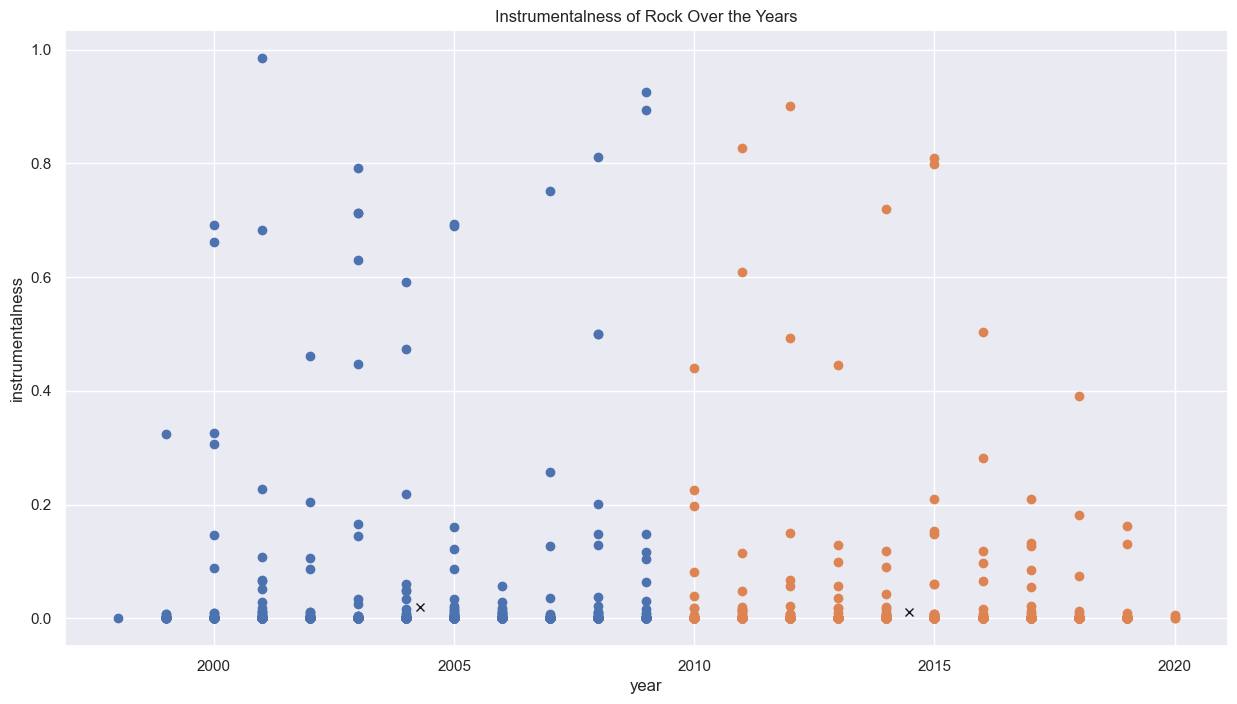

In [438]:
from sklearn import cluster

parameters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df = pd.read_csv('songs_normalize.csv')
df = df.drop('artist', axis = 1)
df = df.drop('song', axis = 1)
for x in range(0, len(df)):
    if df['genre'][x].find('rock') != -1:
        df.loc[x,'genre'] = 1
    else:
        df.loc[x,'genre'] = 0
        
# After trial and error, we found 2 clusters to have the highest score and 5 clusters to have the second highest.

X = df[['year', 'instrumentalness']]
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(2):
    ds = X.iloc[np.where(labels==i)]
    plt.plot(ds['year'],ds['instrumentalness'],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
plt.title("Instrumentalness of Rock Over the Years")
plt.xlabel('year')
plt.ylabel('instrumentalness')

plt.show()

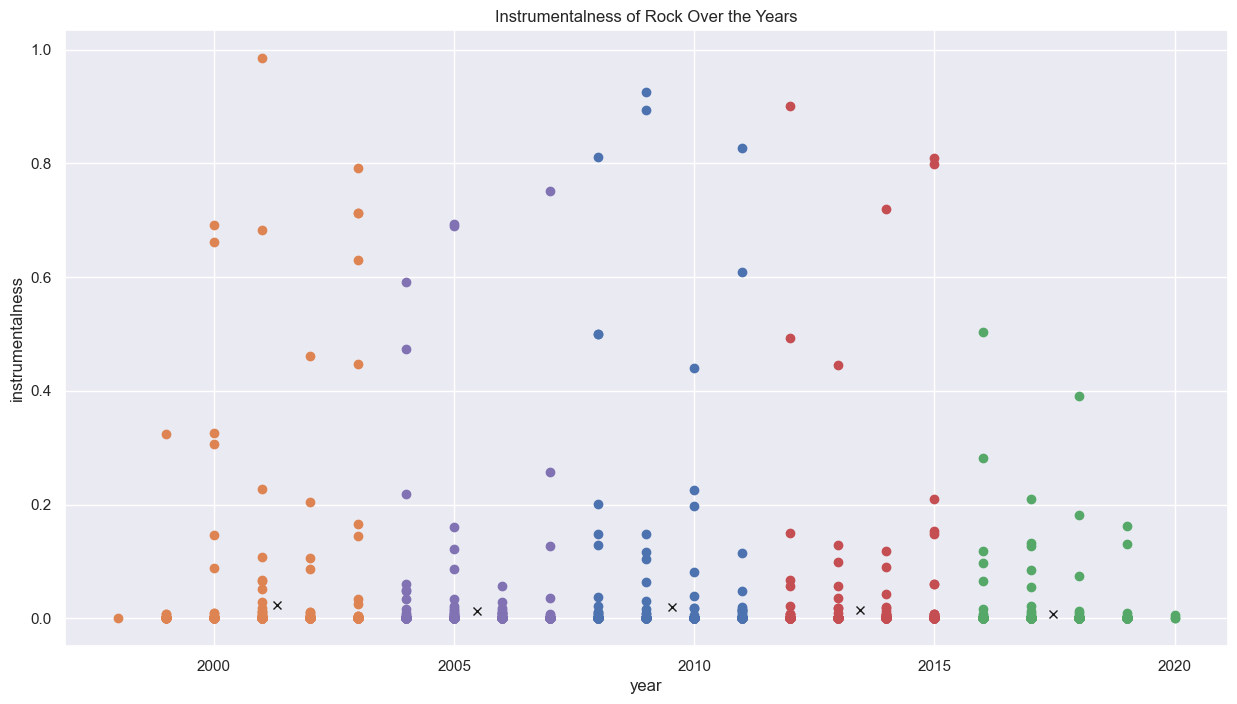

In [441]:
X = df[['year', 'instrumentalness']]
kmeans = cluster.KMeans(n_clusters = 5)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(5):
    ds = X.iloc[np.where(labels==i)]
    plt.plot(ds['year'],ds['instrumentalness'],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
plt.title("Instrumentalness of Rock Over the Years")
plt.xlabel('year')
plt.ylabel('instrumentalness')

plt.show()

## Conclusion
### This is all great, but what does it mean?

The variablility of points in the last visualization speaks to the diversity of the rock genre and music in general. We can conclude from our findings that specific aspects of musicality, like instrumentalness, don't solely define a genre. Although the visualizations do not reveal a distinct trend over the years, the distribution of the upper most points has a general trend to decrease over time. Between 2015 and 2020, the points are clustered much closer than in any of the other intervals, possibly indicating a shift in the genre.